In [1]:
import os
import pandas as pd




database = 'a5a'
n , dimension = (6000, 123) 


path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/decomposition-measurement-ii/'
results_directory = path + f'results/{database}/'  # Replace this with the path to your directory
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/'
tables_path = f'{analysis_files}/latex-tables/'

## columns names 
n_components_column_name = 'n-components'
total_training_time_mean_column = 'transform-and-training-time-mean'
total_training_time_std_column = 'transform-and-training-time-std'
# relevant column names 
transform_time_mean_column = 'transform-time-mean'
transform_time_std_column = 'transform-time-std'
training_time_mean_column = 'training-time-mean'
training_time_std_column = 'training-time-std'


# Get a list of all files in the directory
files = [file for file in os.listdir(results_directory) if os.path.isfile(os.path.join(results_directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
stats_files = [file for file in files if "stats" in file]
stats_files.sort() # kernel methods será el primero

kernel_files = [file for file in stats_files if ('kernel' in file and 'kernel-linear' not in file)]
random_features_files = [file for file in stats_files if file not in kernel_files]


# Create a DataFrame for random_features files
random_features_data = pd.DataFrame()
random_features_list = []
random_features_list_names = []
random_features_data_verbose = pd.DataFrame()
for file in random_features_files:
    # mean
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    data['File'] = file  # Add a column to identify the file 
    # 
    data[total_training_time_mean_column] = data[transform_time_mean_column] + data[training_time_mean_column]
    data[total_training_time_std_column] = data[transform_time_std_column] + data[training_time_std_column]

    random_features_data = pd.concat([random_features_data, data], ignore_index=True)
    random_features_list.append(data)
    random_features_list_names.append(file.replace('-stats.csv', ''))


kernel_data = pd.DataFrame()
kernel_data_verbose = pd.DataFrame()
kernel_list = []
kernel_list_names = []
for file in kernel_files:
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed

    data['File'] = file  # Add a column to identify the file
    data.rename(columns={'score-in-test-mean': 'score-mean', 'score-in-test-std': 'score-std'}, inplace=True)
    data[total_training_time_mean_column] = data[training_time_mean_column]
    data[total_training_time_std_column] = data[training_time_std_column]

    kernel_data = pd.concat([kernel_data, data], ignore_index=True)
    kernel_list.append(data)
    kernel_list_names.append(file.replace('-stats.csv', ''))

print('Ridge files')
print(kernel_list_names)
print('kernel files')
print(kernel_list_names)
kernel_data



['results.dict', 'RFF-SVC-kernel-linear-stats.csv', 'Nystroem-SVC-kernel-linear-stats.csv', 'Nystroem-linear-SVC-stats.csv', 'RFF-linear-SVC-stats.csv', 'kernel-SVC-verbose.csv', 'RFF-verbose.csv', 'Nystroem-verbose.csv', 'kernel-SVC-stats.csv']
Ridge files
['kernel-SVC']
kernel files
['kernel-SVC']


,training-time-mean,training-time-std,prediction-time-mean,prediction-time-std,score-mean,score-std,File,transform-and-training-time-mean,transform-and-training-time-std
0,0.24384,0.03333,2.098127,0.073797,0.762841,0.0,kernel-SVC-stats.csv,0.24384,0.03333


In [2]:
random_features_data

,n-components,fit-time-mean,fit-time-std,transform-time-mean,transform-time-std,training-time-mean,training-time-std,prediction-time-mean,prediction-time-std,score-mean,score-std,File,transform-and-training-time-mean,transform-and-training-time-std
0,321,0.275030,0.162245,0.275030,0.010887,0.560235,0.007021,2.215421,0.098287,0.254159,0.005906,Nystroem-SVC-kernel-linear-stats.csv,0.835265,0.017908
1,376,0.284556,0.089640,0.284556,0.004282,0.682570,0.046029,2.573655,0.088138,0.259055,0.004314,Nystroem-SVC-kernel-linear-stats.csv,0.967127,0.050311
2,431,0.644653,0.436933,0.644653,0.006586,0.791271,0.047151,3.007493,0.060967,0.259029,0.004836,Nystroem-SVC-kernel-linear-stats.csv,1.435925,0.053738
3,487,0.504496,0.142407,0.504496,0.026640,0.992188,0.145635,3.503183,0.134397,0.258634,0.006617,Nystroem-SVC-kernel-linear-stats.csv,1.496684,0.172275
4,542,0.623592,0.327736,0.623592,0.039770,1.035016,0.097387,3.823860,0.097317,0.257894,0.004911,Nystroem-SVC-kernel-linear-stats.csv,1.658608,0.137157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1703,0.003834,0.000046,0.003834,0.027875,1.338605,0.036131,0.014545,0.003589,0.760125,0.000000,RFF-linear-SVC-stats.csv,1.342439,0.064006
116,1758,0.003943,0.000056,0.003943,0.007970,1.391680,0.048314,0.013173,0.000441,0.760125,0.000000,RFF-linear-SVC-stats.csv,1.395623,0.056284
117,1814,0.004708,0.001399,0.004708,0.011430,1.489121,0.093614,0.016706,0.008279,0.760125,0.000000,RFF-linear-SVC-stats.csv,1.493830,0.105044
118,1869,0.004231,0.000066,0.004231,0.051605,1.530469,0.093882,0.015924,0.002267,0.760125,0.000000,RFF-linear-SVC-stats.csv,1.534700,0.145487


In [3]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File", column, n_components_column_name]]
   
      return dataframe

In [4]:
# get columns to be plot
mean_columns_to_be_plot = [column for column in random_features_data.columns if 'mean' in column]
std_columns_to_be_plot = [column for column in random_features_data.columns if 'std' in column]


# Sort by score 

In [5]:
show_dataframe(random_features_data,'score-mean' , ascending=False, n_rows=10)

,File,score-mean,n-components
59,Nystroem-linear-SVC-stats.csv,0.761,1924
58,Nystroem-linear-SVC-stats.csv,0.761,1869
57,Nystroem-linear-SVC-stats.csv,0.761,1814
56,Nystroem-linear-SVC-stats.csv,0.761,1758
119,RFF-linear-SVC-stats.csv,0.760,1924
...,...,...,...
28,Nystroem-SVC-kernel-linear-stats.csv,0.253,1869
18,Nystroem-SVC-kernel-linear-stats.csv,0.252,1316
9,Nystroem-SVC-kernel-linear-stats.csv,0.252,818
8,Nystroem-SVC-kernel-linear-stats.csv,0.252,763


# Plotting 

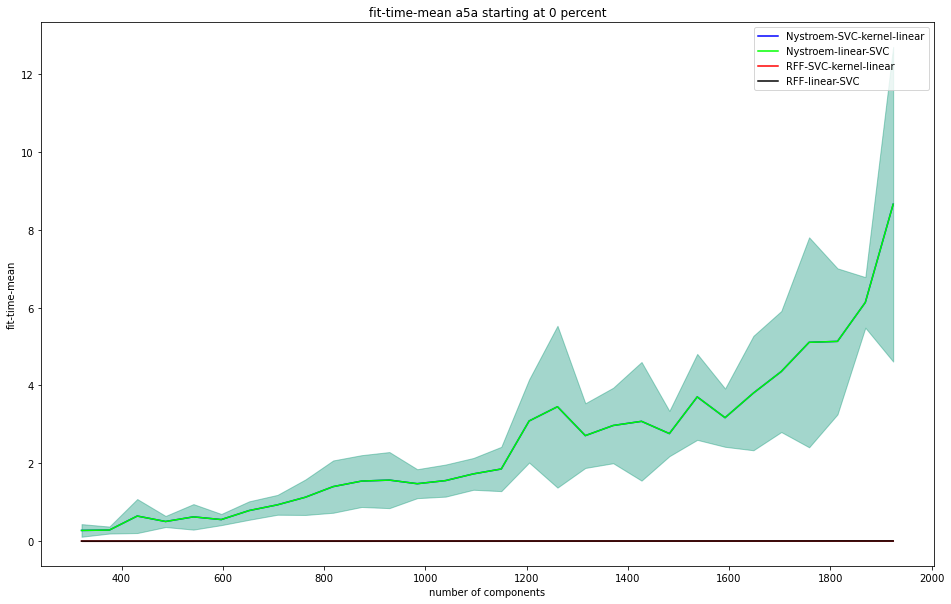

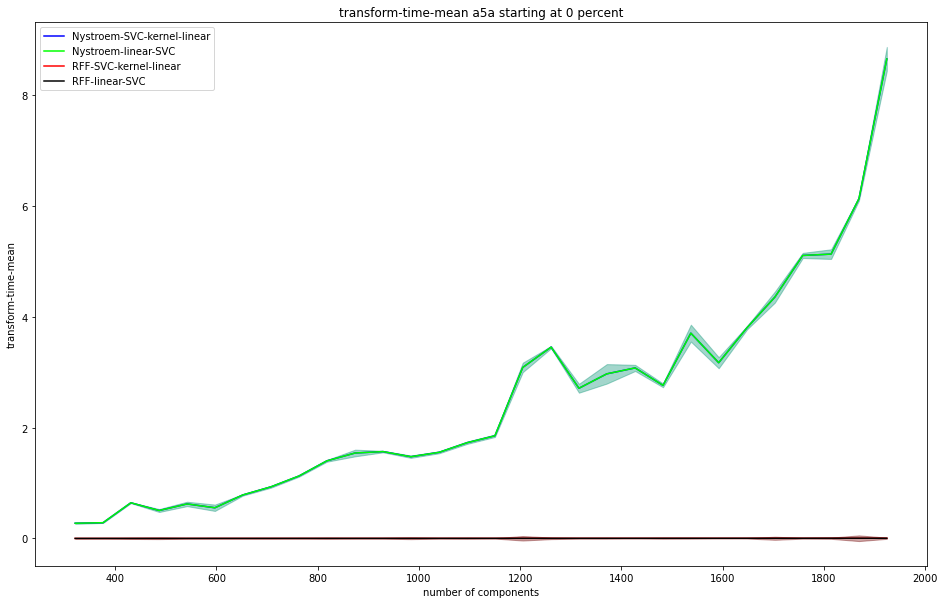

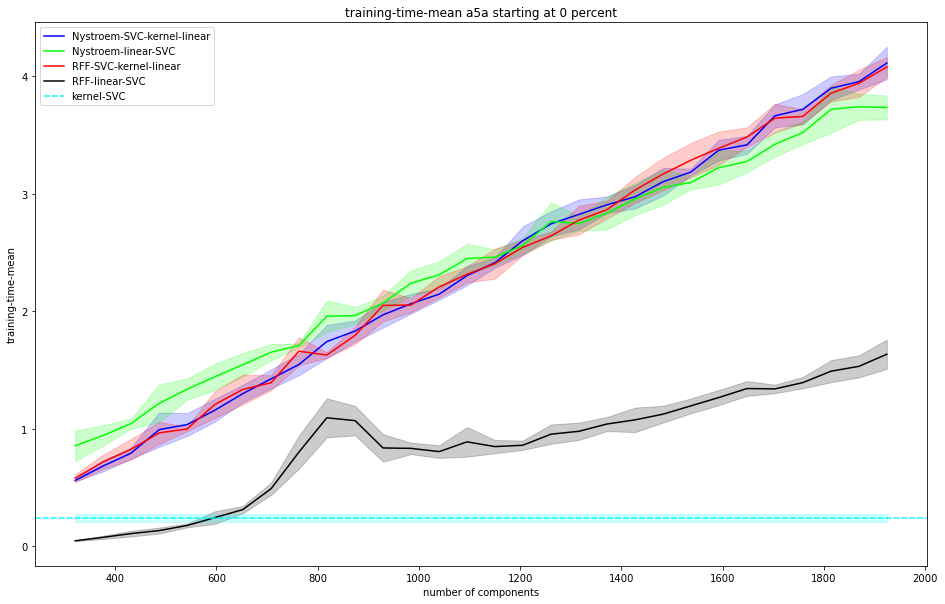

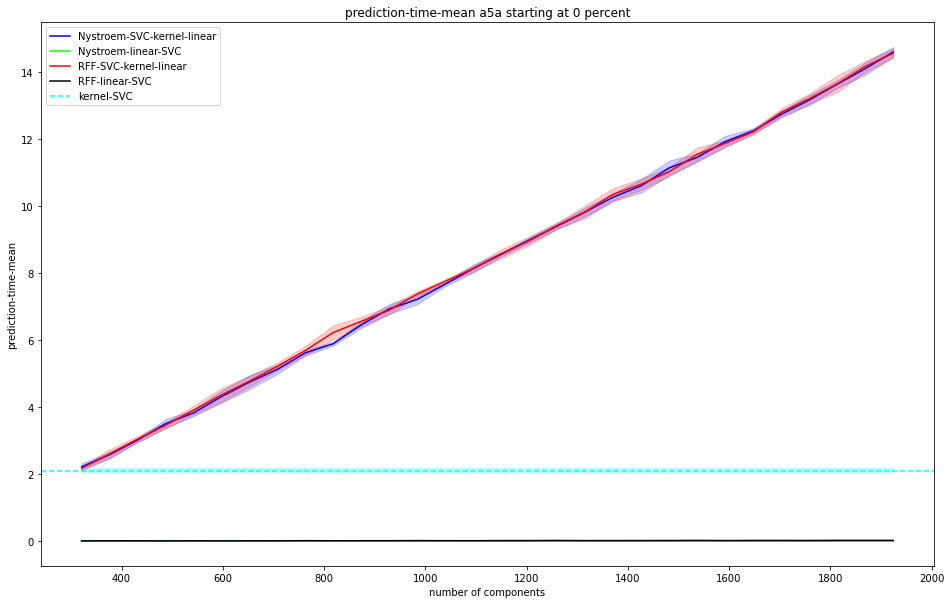

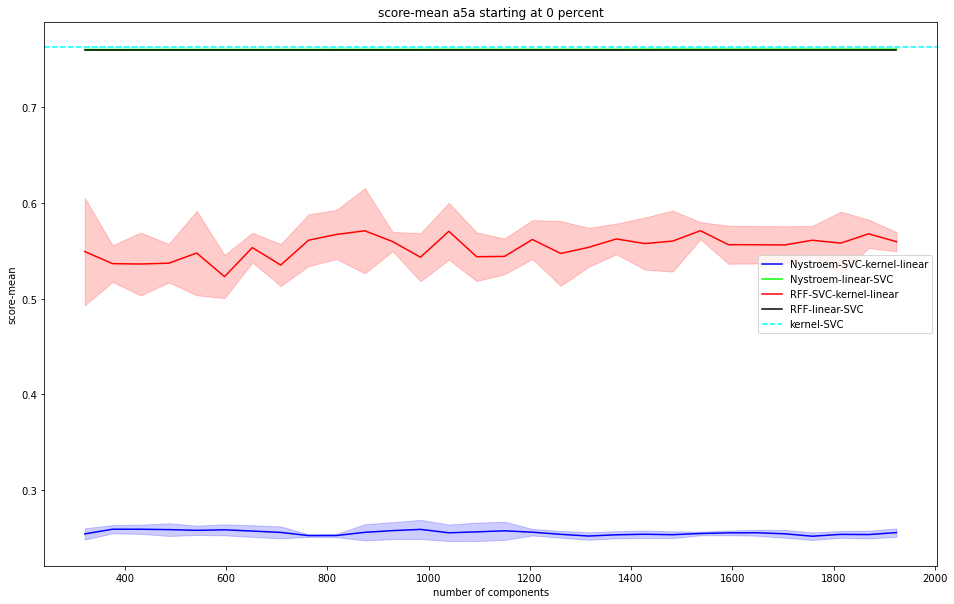

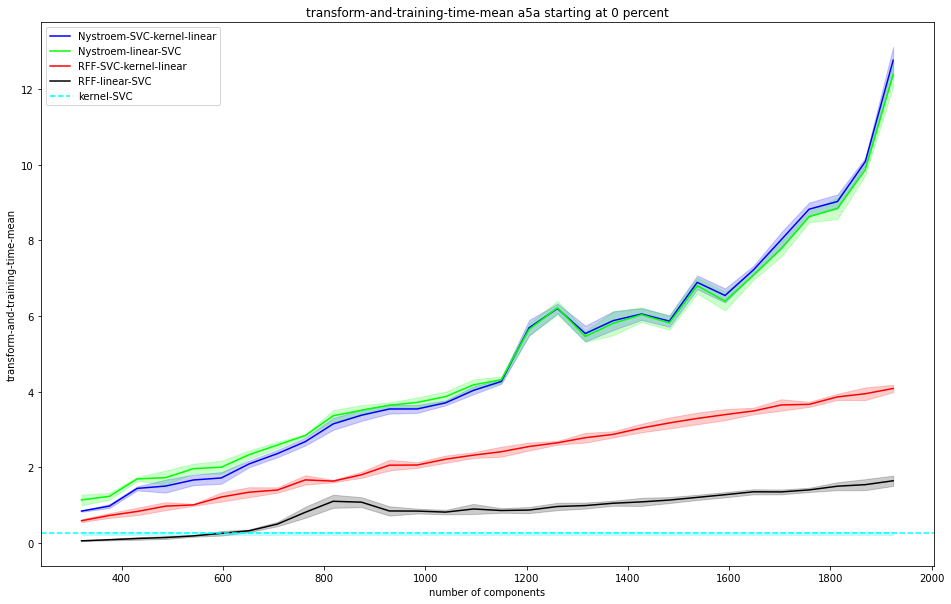

In [6]:
from plotting import view_plots_and_save_them


view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')

